<a href="https://colab.research.google.com/github/sainikhilrai/Deep-Learning/blob/master/autoEncoder_v1.1_range(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
# OM SRI SAI RAM

# Descr: Basic or experiment code to perform loss reserve prediction

##############################
# Step 1 : Reading Sample Data
##############################

import numpy as np
import random
import sklearn
import os

from sklearn.preprocessing import LabelEncoder

os.environ["KERAS_BACKEND"] = "theano"
np.random.seed(7)
random.seed(7)
accident_years = np.arange(2005,2013,1)
development_years = np.arange(0,8,1)
triangle = np.array(([1232,946,520,722,316,165,48,14],
                   [1469,1201,708,845, 461,235,56,18],
                   [1652,1416,959,954,605,287,69,21],
                   [1831,1634,1124,1087,725,314,79,24],
                   [2074,1919,1330,1240,756,359,91,28],
                   [2434,2263,1661,1540,909,432,109,33],
                   [2810,2108,1544,1565,924,439,111,34],
                   [3072,2614,1785,1810,1069,508,128,39]))


In [3]:
print(' Accident Years',accident_years)
print(' Developement Years',development_years)
print(' Input', triangle)


 Accident Years [2005 2006 2007 2008 2009 2010 2011 2012]
 Developement Years [0 1 2 3 4 5 6 7]
 Input [[1232  946  520  722  316  165   48   14]
 [1469 1201  708  845  461  235   56   18]
 [1652 1416  959  954  605  287   69   21]
 [1831 1634 1124 1087  725  314   79   24]
 [2074 1919 1330 1240  756  359   91   28]
 [2434 2263 1661 1540  909  432  109   33]
 [2810 2108 1544 1565  924  439  111   34]
 [3072 2614 1785 1810 1069  508  128   39]]


In [0]:
newTriangle= np.zeros([8,8])
for i in range(triangle.shape[0]):
  for j in range(triangle.shape[1]-i):
    newTriangle[i,j]= triangle[i,j]



In [5]:
print(newTriangle)

[[1232.  946.  520.  722.  316.  165.   48.   14.]
 [1469. 1201.  708.  845.  461.  235.   56.    0.]
 [1652. 1416.  959.  954.  605.  287.    0.    0.]
 [1831. 1634. 1124. 1087.  725.    0.    0.    0.]
 [2074. 1919. 1330. 1240.    0.    0.    0.    0.]
 [2434. 2263. 1661.    0.    0.    0.    0.    0.]
 [2810. 2108.    0.    0.    0.    0.    0.    0.]
 [3072.    0.    0.    0.    0.    0.    0.    0.]]


In [6]:
# Cum calc
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]):
        C[i,j] = sum(triangle[i,:j+1])

print('C',C)

C [[ 1232.  2178.  2698.  3420.  3736.  3901.  3949.  3963.]
 [ 1469.  2670.  3378.  4223.  4684.  4919.  4975.  4993.]
 [ 1652.  3068.  4027.  4981.  5586.  5873.  5942.  5963.]
 [ 1831.  3465.  4589.  5676.  6401.  6715.  6794.  6818.]
 [ 2074.  3993.  5323.  6563.  7319.  7678.  7769.  7797.]
 [ 2434.  4697.  6358.  7898.  8807.  9239.  9348.  9381.]
 [ 2810.  4918.  6462.  8027.  8951.  9390.  9501.  9535.]
 [ 3072.  5686.  7471.  9281. 10350. 10858. 10986. 11025.]]


In [7]:
l_encode = LabelEncoder()
l_encode.fit(accident_years)
a_yr = l_encode.transform(accident_years)
l_encode.fit(development_years)
dev_yr = l_encode.transform(development_years)

print(a_yr)
print(dev_yr)


[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [0]:
train_data = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],C[i,j]])
        
test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]):
        test_data.append([a_yr[i],dev_yr[j],C[i,j]])

 
#convert trainData and testData into numpyArray
#train_data = np.array(train_data)
test_data = np.array(test_data)


In [0]:
#code for generating the other triangle

for iteratrion in range(100):
  newTriangle2= np.zeros((triangle.shape[0],triangle.shape[1]))
  for i in range(triangle.shape[0]):
    for j in range(triangle.shape[1]-i):
        newTriangle2[i,j]= newTriangle[i,j] + np.random.randint(-10,10)
  difference= newTriangle2-newTriangle
  
  #print("New Triangle:\n",newTriangle)
  #print("New Triangle2:\n",newTriangle2)
  #print("difference:\n",difference)
  
  
  #get the column of the difference
  columncount=triangle.shape[1]
  for columnIndex in range(triangle.shape[1]):
    column= difference[:columncount,columnIndex]
    np.random.shuffle(column)
    newTriangle[:columncount,columnIndex]= newTriangle[:columncount,columnIndex]+ column
    columncount= columncount-1
    
  #print("Bootstrap New Triangle:\n")
  #print(newTriangle)
  
  #find the cumulative sum of new Bootstrap New Triangle
  # Cum calc
  newC = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(newTriangle)[1]):
        newC[i,j] = sum(newTriangle[i,:j+1])

  
  
  #combine the new triangle with the already existing training set
  
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],newC[i,j]])
  

In [10]:
train_data= np.array(train_data)
train_data.shape
#train_data[71,:]

(3636, 3)

In [0]:
##############
# define the loss function
################

def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1)

In [0]:
################################
# Step 3 : Build Model using Neural Networks
# Note : MSE loss used here
###############################

import keras
import keras.backend as K
from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.callbacks import RemoteMonitor
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers



In [13]:
###################
# Auto Encoder Network Architecture #
######################

#encoder part
inputData= Input(shape=(2,))
encoded= Dense(20,activation='relu',kernel_initializer='normal')(inputData)
encoded= Dense(10,activation='relu')(encoded)
encoded= Dense(2,activation='relu')(encoded)  #latent space representation

#decoder part
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(2, activation='relu')(decoded)

#combine the encoder and the decoder
autoencoder = Model(inputData, decoded)

#get only the encoder part
encoderPart= Model(inputData,encoded)

adam = optimizers.Adam(lr=0.1)
autoencoder.compile(loss="mse", optimizer='adam',metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)
filepath="v5.best.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

#history = autoencoder.fit(x=train_data[:,:2], y=train_data[:,:2], batch_size=1, epochs=300, verbose=1, callbacks=[checkpointer,reduce_lr,early_stop], validation_split=0.3, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
history = autoencoder.fit(x=train_data[:,:2], y=train_data[:,:2], batch_size=1, epochs=300, verbose=1, callbacks=None, validation_split=0.3, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2545 samples, validate on 1091 samples
Epoch 1/300
2545/2545 [==============================] - 4s 1ms/step - loss: 0.7511 - acc: 0.8943 - val_loss: 5.5465e-05 - val_acc: 0.9175
Epoch 2/300
2545/2545 [==============================] - 3s 1ms/step - loss: 0.0018 - acc: 0.9446 - val_loss: 7.8132e-06 - val_acc: 0.9450
Epoch 3/300
2545/2545 [==============================] - 3s 1ms/step - loss: 0.0019 - acc: 0.9521 - val_loss: 2.5581e-04 - val_acc: 1.0000
Epoch 4/300
2545/2545 [==============================] - 3s 1ms/step - loss: 0.0034 - acc: 0.9682 - val_loss: 8.4500e-04 - val_acc: 1.0000
Epoch 5/300
2545/2545 [==============================] - 3s 1ms/step - loss: 0.0030 - acc: 0.9580 - val_loss: 9.1562e-06 - val_acc: 0.9450
Epoch 6/300
2545/2545 [==============================] - 3s 1ms/step - loss: 0.0041 - acc: 0.9595 - val_loss: 2.1874e-05 - val_acc: 1.000

In [0]:
#get the encoded representation of the train Data and test Data

train_data_Encoded= encoderPart.predict(train_data[:,:2])
test_data_Encoded= encoderPart.predict(test_data[:,:2])

In [15]:
train_data[0,2]

1232.0

In [16]:
train_data_Encoded[0,1]

0.0

In [0]:
#make new train data and test Data
newTrainData= []
newTestData= []
for i in range(train_data.shape[0]):
  newTrainData.append([train_data_Encoded[i,0],train_data_Encoded[i,1],train_data[i,2]])
  
for i in range(test_data.shape[0]):
  newTestData.append([test_data_Encoded[i,0],test_data_Encoded[i,1],test_data[i,2]])
  
newTrainData= np.array(newTrainData)
newTestData= np.array(newTestData)



In [18]:
newTrainData.shape

(3636, 3)

In [19]:
newTestData.shape

(28, 3)

In [20]:
newTrainData[0,]

array([1.71574503e-02, 0.00000000e+00, 1.23200000e+03])

In [0]:
#build the neural Network for prediction

neuralNetwork = Sequential()
ip_dim = 2
#model.add(Dropout(0.1, input_shape=(ip_dim,))
neuralNetwork.add(Dense(10, input_dim=ip_dim, kernel_initializer='normal', activation='relu'))
neuralNetwork.add(Dense(5, kernel_initializer='normal', activation='relu'))
#neuralNetwork.add(Dropout(0.1))
neuralNetwork.add(Dense(2, kernel_initializer='normal', activation='relu'))
#neuralNetwork.add(Dropout(0.1))
#neuralNetwork.add(Dense(10, kernel_initializer='normal', activation='relu'))
neuralNetwork.add(Dense(1, kernel_initializer='normal',activation="exponential"))
# Compile model
neuralNetwork.compile(loss=poisson_dev, optimizer='adam',metrics=['accuracy'])



In [22]:
history = neuralNetwork.fit(x=newTrainData[:,:ip_dim], y=newTrainData[:,ip_dim], batch_size=1, epochs=500, verbose=1, callbacks=None, validation_split=0.33, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


Train on 2436 samples, validate on 1200 samples
Epoch 1/500
2436/2436 [==============================] - 3s 1ms/step - loss: 12706.3640 - acc: 0.0000e+00 - val_loss: 7168.4000 - val_acc: 0.0000e+00
Epoch 2/500
2436/2436 [==============================] - 3s 1ms/step - loss: 4638.4270 - acc: 0.0000e+00 - val_loss: 1891.9397 - val_acc: 0.0000e+00
Epoch 3/500
2436/2436 [==============================] - 3s 1ms/step - loss: 478.8442 - acc: 4.1051e-04 - val_loss: 268.5317 - val_acc: 8.3333e-04
Epoch 4/500
2436/2436 [==============================] - 3s 1ms/step - loss: 283.1987 - acc: 0.0000e+00 - val_loss: 278.8452 - val_acc: 0.0000e+00
Epoch 5/500
2436/2436 [==============================] - 3s 1ms/step - loss: 283.4959 - acc: 0.0000e+00 - val_loss: 266.2173 - val_acc: 0.0000e+00
Epoch 6/500
2436/2436 [==============================] - 3s 1ms/step - loss: 285.4822 - acc: 0.0000e+00 - val_loss: 314.8965 - val_acc: 0.0000e+00
Epoch 7/500
2436/2436 [==============================] - 3s 1ms/s

In [23]:
###########################################
# Step 4: Model Prediction
#############################################
out = neuralNetwork.predict(newTestData[:,:2])
print(out)

[[5001.1714]
 [6076.9854]
 [6462.7324]
 [6657.912 ]
 [7011.3906]
 [7118.674 ]
 [7211.494 ]
 [7344.077 ]
 [7456.4434]
 [7570.5435]
 [7054.5913]
 [7628.1304]
 [7810.2476]
 [7929.7544]
 [8051.0894]
 [6532.3125]
 [7462.17  ]
 [8068.845 ]
 [8306.009 ]
 [8433.101 ]
 [8562.146 ]
 [5339.2217]
 [7020.49  ]
 [7893.289 ]
 [8535.022 ]
 [8833.247 ]
 [8968.406 ]
 [9144.037 ]]


In [24]:
#################################
# Step 5 : Reserve calculation
#################################

import matplotlib.pyplot as plt
#print(' Test Data',test_data)
#print('pred', model.predict([2,]))
#print('C',C)
true_reserve = 0
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    true_reserve += (C[i,np.shape(triangle)[1]-1] - C[i,j])
    #print(true_reserve)
print(" True reserve",true_reserve)


 True reserve 17352.0


In [0]:
appended= np.array(list(zip(test_data,np.ravel(out))))
len(appended)

out_dict = {}
for i in range(len(appended)):
    #print(tuple(appended[i,0][:2]))
    #print(appended[i,1])
    out_dict[tuple(appended[i,0][:2])] = appended[i,1]



In [27]:
appended[0,0][:2]

array([1., 7.])

In [0]:
pred_reserve = 0
final_pred = []
actuals = []
for i in range(1,np.shape(triangle)[0]):
    j = int(np.shape(triangle)[1]-1-i)    
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last pred', out_dict[(i,np.shape(triangle)[1]-1)])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    final_pred.append(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    actuals.append(C[i,np.shape(triangle)[1]-1] - C[i,j])
    pred_reserve +=(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    

In [27]:
print(" Predicted reserve",pred_reserve)
print(' Bias',pred_reserve - true_reserve)
print('Bias pct',(pred_reserve-true_reserve)/true_reserve)


 Predicted reserve 13750.39404296875
 Bias -3601.60595703125
Bias pct -0.20756143136417993


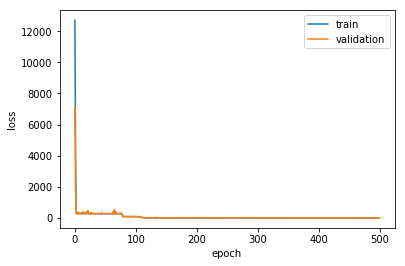

In [35]:
#ploting the loss of Neural Network
from matplotlib import pyplot

#training loss and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.legend(['train','validation'],loc='upper right')
pyplot.show()

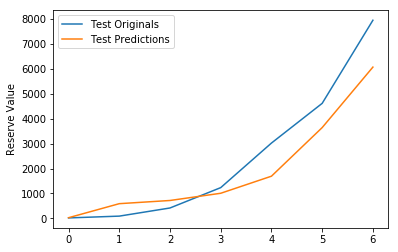

In [36]:
#plot showing predicted value vs actual value
plt.figure()
plt.plot(actuals, label = "Test Originals")
plt.plot(final_pred, label ="Test Predictions")
plt.ylabel("Reserve Value")
plt.legend()
plt.show()


In [33]:
test_data.shape

(28, 3)

In [34]:
out.shape

(28, 1)

In [38]:
type(test_data)
type(out)
out

numpy.ndarray

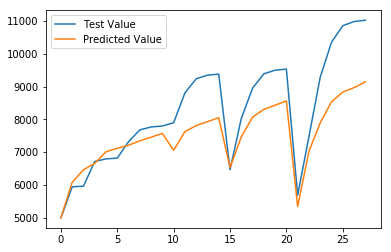

In [40]:
#plot for the predicted and the test lower triangle
plt.plot(test_data[:,2],label='Test Value')
plt.plot(out,label='Predicted Value')
plt.legend()